In [67]:
import os
import re
import glob
import matplotlib.pyplot as plt
import numpy as np

test_cases  = ['art', 'blackscholes', 'streamcluster']
target_file = "stats.txt"
energy      = r"Total energy \(J\)\s*:\s*([0-9.eE+-]+)"
latency     = r"Time \(s\)\s*:\s*([0-9.eE+-]+)"
num_core    = r"Cores\s*:\s*([0-9]+)"
area        = r"Area \(mm\^2\)\s*:\s*([0-9.eE+-]+)"


In [68]:
# get latency and energy
latency_all = []
energy_all  = []
core_all    = []
area_all    = []

for t in range(len(test_cases)):
    prefix = test_cases[t]
    pattern = f"./pa1_1/{prefix}*/"
    folders = [d for d in glob.glob(pattern) if os.path.isdir(d)]
    latency_case_ = []
    energy_case_  = []
    core_case_    = []
    area_case_    = []
    for folder in folders:
        file_path = os.path.join(folder, target_file)
        if not os.path.exists(file_path):
            print(f"Missing: {file_path}")
            continue

        with open(file_path, "r") as f:
            for line in f:
                match = re.search(num_core, line)
                if match:
                    value = float(match.group(1))
                    # print(f"{folder}: {value}")
                    core_case_.append(value)
                    break
            for line in f:
                match = re.search(area, line)
                if match:
                    value = float(match.group(1))
                    # print(f"{folder}: {value}")
                    area_case_.append(value)
                    break
            for line in f:
                match = re.search(latency, line)
                if match:
                    value = float(match.group(1))
                    # print(f"{folder}: {value}")
                    latency_case_.append(value)
                    break
            for line in f:
                match = re.search(energy, line)
                if match:
                    value = float(match.group(1))
                    # print(f"{folder}: {value}")
                    energy_case_.append(value)
                    break
            
    latency_all.append(latency_case_)
    energy_all.append(energy_case_)
    core_all.append(core_case_)
    area_all.append(area_case_)

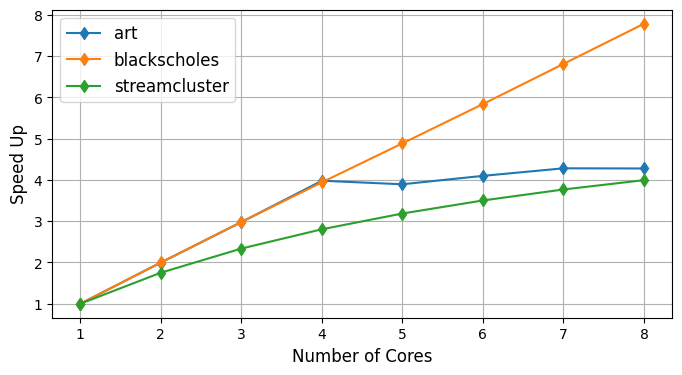

In [69]:
# [1] Plot latency
plt.figure(figsize=(8,4))
for n in range(3):
    core_n      = np.array(core_all[n])
    latency_n   = np.array(latency_all[n])
    sorted_data = sorted(zip(core_n, latency_n))
    sorted_core_n, sorted_latency_n = zip(*sorted_data)
    plt.plot(sorted_core_n, sorted_latency_n[0]/sorted_latency_n, marker='d', label=test_cases[n])
plt.xlabel('Number of Cores', fontsize = 12)
plt.ylabel('Speed Up', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-1a.png', bbox_inches='tight')


[1.         0.69521503 0.60653649 0.57125548 0.55782995 0.55518716
 0.55891382 0.56648527]


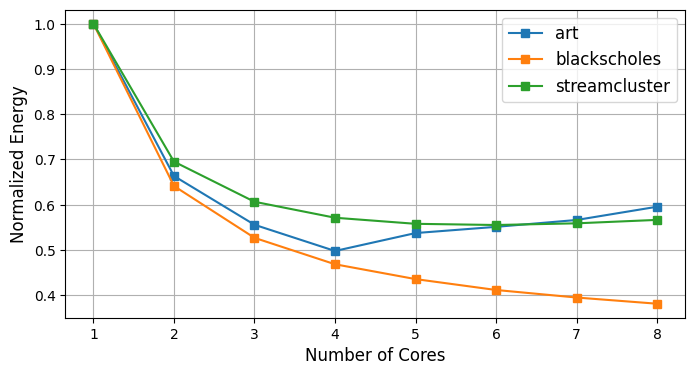

In [70]:
# [4] Plot energy
plt.figure(figsize=(8,4))
for n in range(3):
    core_n      = np.array(core_all[n])
    energy_n   = np.array(energy_all[n])
    sorted_data = sorted(zip(core_n, energy_n))
    sorted_core_n, sorted_energy_n = zip(*sorted_data)
    plt.plot(sorted_core_n, sorted_energy_n/sorted_energy_n[0], marker='s', label=test_cases[n])
plt.xlabel('Number of Cores', fontsize = 12)
plt.ylabel('Normalized Energy', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-1d.png', bbox_inches='tight')
print(sorted_energy_n / sorted_energy_n[0])

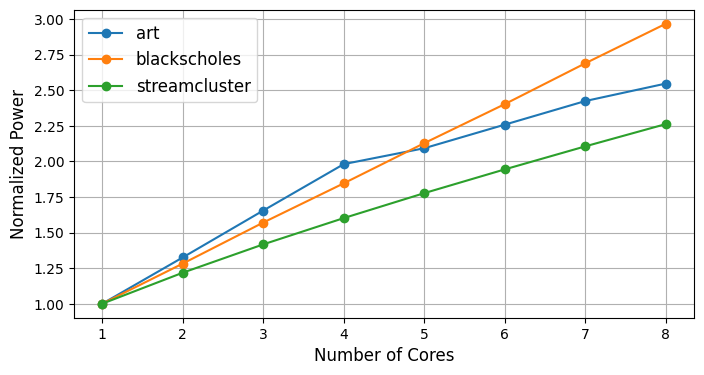

In [71]:
# [4] Plot power
plt.figure(figsize=(8,4))
for n in range(3):
    core_n      = np.array(core_all[n])
    energy_n    = np.array(energy_all[n])
    latency_n   = np.array(latency_all[n])
    power_n     = energy_n/latency_n
    sorted_data = sorted(zip(core_n, power_n))
    sorted_core_n, sorted_power_n, = zip(*sorted_data)
    plt.plot(sorted_core_n, sorted_power_n/sorted_power_n[0], marker='o', label=test_cases[n])
plt.xlabel('Number of Cores', fontsize = 12)
plt.ylabel('Normalized Power', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-1e.png', bbox_inches='tight')


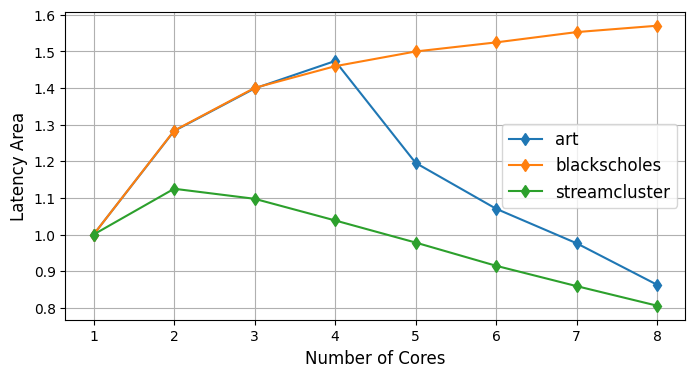

In [72]:
# Plot latency/area
plt.figure(figsize=(8,4))
for n in range(3):
    core_n      = np.array(core_all[n])
    latency_n   = np.array(latency_all[n])
    area_n      = np.array(area_all[n])
    latency_area_n = latency_n * area_n
    sorted_data = sorted(zip(core_n, latency_area_n))
    sorted_core_n, sorted_latency_area_n = zip(*sorted_data)
    plt.plot(sorted_core_n, sorted_latency_area_n[0]/sorted_latency_area_n, marker='d', label=test_cases[n])
plt.xlabel('Number of Cores', fontsize = 12)
plt.ylabel('Latency Area', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()


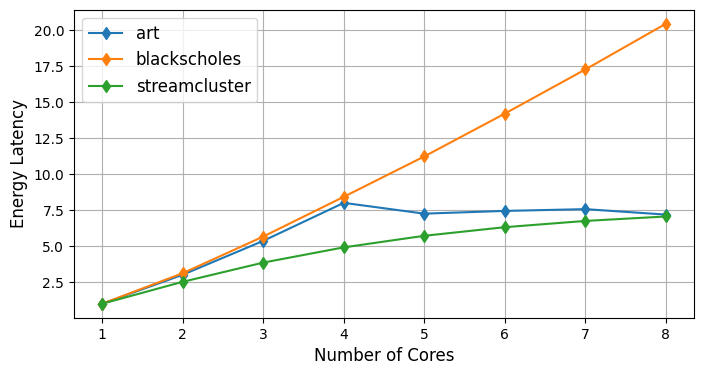

In [73]:
# Plot energy/area
plt.figure(figsize=(8,4))
for n in range(3):
    core_n      = np.array(core_all[n])
    energy_n    = np.array(energy_all[n])
    latency_n   = np.array(latency_all[n])
    energy_latency_n = energy_n * latency_n
    sorted_data = sorted(zip(core_n, energy_latency_n))
    sorted_core_n, sorted_energy_latency_n = zip(*sorted_data)
    plt.plot(sorted_core_n, sorted_energy_latency_n[0]/sorted_energy_latency_n, marker='d', label=test_cases[n])
plt.xlabel('Number of Cores', fontsize = 12)
plt.ylabel('Energy Latency', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
